# Imports

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Define functions

### Initialize function

In [2]:
def initialize_parameters(p):
    """
    param p: Integer representing how many features each datapoint include
    
    return: b is zero integer, w is an array if zeros with length p
    """
    w = np.zeros(p)
    b = 0
    return b,w

### Forward propogation

In [3]:
def model_forward(w,x,b):
    """
    param w: Array of weights for the linear model
    param x: 2D array of input data
    param b: Bias for the linear model
    
    return: An array that is the result of the dot product of input data and weights with added bias.
    """
    
    return np.dot(x,w) + b

### Compute cost

In [4]:
def compute_cost(y,z):
    
    """
    param y: Array with the correct model output
    param z: Array with predicted model output
    
    return: Scalar that represent the total cost for all datapoints with the current parameters
    """
    
    J = np.mean((y-z)**2)
    
    return J

### Compute gradients

In [5]:
def model_backward(z,y,x):
    """
    param z: Array with predicted model output
    param y: Array with the correct model output
    param x: 2D array of input data
    
    return: Calculated gradients for both bias "scalar" and weights "array"
    """
    
    n,p = x.shape
    
    grad_Jb = (2/n) * np.sum(z-y)   
    grad_Jw = (2/n) * np.dot(x.T,(z-y))
    
    return grad_Jb, grad_Jw
    

### Take a step

In [6]:
def update_parameters(b, w, grad_Jb, grad_Jw, alpha):
    """
    param b: Integer represents model bias
    param w: Array represent model weights
    param grad_Jb: Integer represents gradient for bias
    param grad_Jw: Array represent gradient for weights
    param alpha: Integer represent step size
    
    return updated model parameters after step with size alpha
    """
    
    b -= alpha*grad_Jb
    w -= alpha*grad_Jw
    
    return b,w 

### Predict

In [7]:
def predict(w,x,b):
    """
    Wrapper for model_forward
    
    param w: Array of weights for the linear model
    param x: 2D array of input data
    param b: Bias for the linear model
    
    return: Array with model preduction
    """
    
    return model_forward(w,x,b)

### Train model 

In [8]:
def train_model(alpha,iterations,x,y):
    """
    param alpha: Integer represent stepsize
    param iterations: Integer represent total iterations/epochs
    param x: 2D array of model inputs
    param y: Array of correct model outputs
    
    return: Bias as integer, weights as array, cost as integer
    """
    
    n,p = x.shape
    
    # Initialize
    cost = np.zeros(iterations)
    b,w = initialize_parameters(p)
    
    # Train
    for i in range(iterations):
        z = model_forward(w,x,b)
        J = compute_cost(y,z)
        cost[i] = J
        grad_Jb, grad_Jw = model_backward(z,y,x)
        b,w = update_parameters(b,w,grad_Jb,grad_Jw,alpha)
        
    return b,w,cost


In [9]:
def normalize(x):
    """
    param x: 2D input array
    
    return: Normalized input matrix X
    """
    
    # Normalize
    means = np.mean(x, axis=0)
    stds = np.std(x, axis=0)

    x = (x-means)/stds
    
    return x

# Read data

In [10]:
# import data
Auto = pd.read_csv('Auto.csv', na_values='?', dtype={'ID': str}).dropna().reset_index()

In [11]:
Auto.head()

,index,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


# Model 1  (1 input)

### Prepare data

In [12]:
# Extract relevant data features
x = Auto[['horsepower']].values
y = Auto[['mpg']].values
y = y.reshape(-1)

n,p = x.shape

In [13]:
# Normalize
x = normalize(x)

### Settings

In [14]:
iterations = 1000
alpha_list = [1, 1e-1, 1e-2, 1e-3, 1e-4]

### Train

In [15]:
cost_vec = np.zeros((len(alpha_list),iterations))
y_preds = np.zeros((len(alpha_list),len(y)))
b_vec = []
w_vec = []

idx=0
for alpha in alpha_list:
    #Train
    b, w, cost = train_model(alpha,iterations,x,y)
    
    # Save results for each alpha
    b_vec.append(b)
    w_vec.append(w)
    y_preds[idx] = predict(w,x,b)
    cost_vec[idx] = cost
    
    #step
    idx+=1

### Plot cost

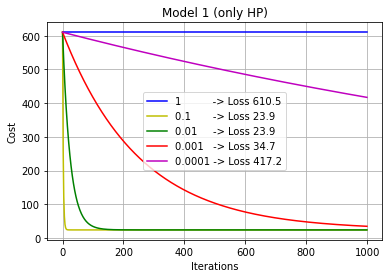

In [16]:
# Define fig
fig, ax = plt.subplots()

# Plot the data on the axis
ax.plot(range(iterations), cost_vec[0],'b-',label=str(alpha_list[0])+"          -> Loss "+str(round(cost_vec[0][-1],1)))
ax.plot(range(iterations), cost_vec[1],'y-',label=str(alpha_list[1])+"       -> Loss "+str(round(cost_vec[1][-1],1)))
ax.plot(range(iterations), cost_vec[2],'g-',label=str(alpha_list[2])+"     -> Loss "+str(round(cost_vec[2][-1],1)))
ax.plot(range(iterations), cost_vec[3],'r-',label=str(alpha_list[3])+"   -> Loss "+str(round(cost_vec[3][-1],1)))
ax.plot(range(iterations), cost_vec[4],'m-',label=str(alpha_list[4])+" -> Loss "+str(round(cost_vec[4][-1],1)))


# Settings
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.legend()
ax.grid(True)
ax.set_title('Model 1 (only HP)')

# Show the plot
plt.savefig("Model_1_loss.png")

# Raw data and Model 1

Alpha =  1
     Weights W = [4.73221462e-12]  , b = [ 5.684341886080802e-14 ]


Alpha =  0.1
     Weights W = [-6.0678724]  , b = [ 23.44591836734693 ]


Alpha =  0.01
     Weights W = [-6.06787239]  , b = [ 23.44591832788821 ]


Alpha =  0.001
     Weights W = [-5.24831811]  , b = [ 20.27920659973732 ]


Alpha =  0.0001
     Weights W = [-1.10001803]  , b = [ 4.250407931088679 ]




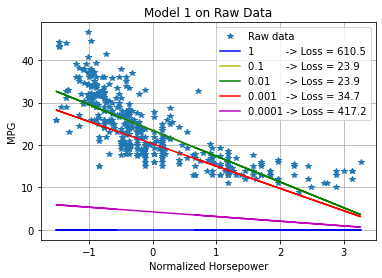

In [17]:
# Define fig
fig, ax = plt.subplots()

# Plot the data on the axis
ax.plot(x, y,'*',label="Raw data")

ax.plot(x,y_preds[0],'b-', label=str(alpha_list[0])+"          -> Loss = "+str(round(cost_vec[0][-1],1)))
ax.plot(x,y_preds[1],'y-', label=str(alpha_list[1])+"       -> Loss = "+str(round(cost_vec[1][-1],1)))
ax.plot(x,y_preds[2],'g-', label=str(alpha_list[2])+"     -> Loss = "+str(round(cost_vec[2][-1],1)))
ax.plot(x,y_preds[3],'r-', label=str(alpha_list[3])+"   -> Loss = "+str(round(cost_vec[3][-1],1)))
ax.plot(x,y_preds[4],'m-', label=str(alpha_list[4])+" -> Loss = "+str(round(cost_vec[4][-1],1)))

# Settings
ax.set_xlabel('Normalized Horsepower')
ax.set_ylabel('MPG')
ax.legend()
ax.grid(True)
ax.set_title('Model 1 on Raw Data')

# Show the plot
plt.savefig("Model_1_data.png")

# Print model parameters
for i in range(len(alpha_list)):
    print("Alpha = ",alpha_list[i])
    print("     Weights W =",w_vec[i]," , b = [",b_vec[i],"]\n\n")

# Model 2 (all data)

### Prepare data

In [18]:
# Extract relevant data features
x = Auto[['cylinders','displacement','horsepower','weight', 'acceleration','year','origin']].values
y = Auto[['mpg']].values
y = y.reshape(-1)

n,p = x.shape

In [19]:
# Normalize
x = normalize(x)

In [20]:
# Create array for results
z = np.zeros(n)

### Settings

In [21]:
iterations = 1000
alpha_list = [1, 1e-1, 1e-2, 1e-3, 1e-4]

### Train

In [22]:
cost_vec = np.zeros((len(alpha_list),iterations))
y_preds = np.zeros((len(alpha_list),len(y)))
b_vec = []
w_vec = []

idx=0
for alpha in alpha_list:
    #Train
    b, w, cost = train_model(alpha,iterations,x,y)
    
    # Save results for each alpha
    b_vec.append(b)
    w_vec.append(w)
    y_preds[idx] = predict(w,x,b)
    cost_vec[idx] = cost
    
    #step
    idx+=1

C:\Users\edvin\anaconda3\lib\site-packages\numpy\core\_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\edvin\AppData\Local\Temp\ipykernel_18292\773933181.py:10: RuntimeWarning: overflow encountered in square
  J = np.mean((y-z)**2)
C:\Users\edvin\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\edvin\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


### Plot cost

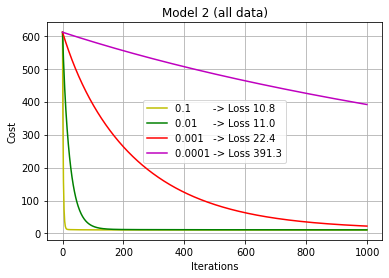

In [27]:
# Define fig
fig, ax = plt.subplots()

# Plot the data on the axis
#ax.plot(range(iterations), cost_vec[0],'b-',label=str(alpha_list[0])+" cost "+str(round(cost_vec[0][-1],1)))
ax.plot(range(iterations), cost_vec[1],'y-',label=str(alpha_list[1])+"       -> Loss "+str(round(cost_vec[1][-1],1)))
ax.plot(range(iterations), cost_vec[2],'g-',label=str(alpha_list[2])+"     -> Loss "+str(round(cost_vec[2][-1],1)))
ax.plot(range(iterations), cost_vec[3],'r-',label=str(alpha_list[3])+"   -> Loss "+str(round(cost_vec[3][-1],1)))
ax.plot(range(iterations), cost_vec[4],'m-',label=str(alpha_list[4])+" -> Loss "+str(round(cost_vec[4][-1],1)))


# Settings
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.legend()
ax.grid(True)
ax.set_title('Model 2 (all data)')

# Show the plot
plt.savefig("Model_2_loss.png")

In [28]:
# Print model parameters
for i in range(len(alpha_list)):
    print("Alpha = ",alpha_list[i])
    print("     Weights W =",w_vec[i]," , b = [",b_vec[i],"]\n\n")

Alpha =  1
     Weights W = [nan nan nan nan nan nan nan]  , b = [ nan ]


Alpha =  0.1
     Weights W = [-0.83872258  2.07593541 -0.65098093 -5.49126747  0.22193459  2.76208132
  1.1470395 ]  , b = [ 23.445918367346934 ]


Alpha =  0.01
     Weights W = [-0.37006102  0.49646589 -0.9471362  -4.31517539 -0.09176931  2.67992551
  1.07596682]  , b = [ 23.445918327888215 ]


Alpha =  0.001
     Weights W = [-1.07540966 -1.10195351 -1.20634673 -1.94304267 -0.10183909  2.16401205
  1.04595621]  , b = [ 20.27920659973732 ]


Alpha =  0.0001
     Weights W = [-0.78099371 -0.80866385 -0.78442052 -0.87061331  0.37827697  0.67159129
  0.58308813]  , b = [ 4.250407931088679 ]


